# Prueba Auxiliar Analista de datos: 1. Limpieza y Preparación de Datos
* **Nombre:** John Eduard Delgado Gómez
* **CC:** 1061820435
* **Celular:** 3148068955

In [36]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Obteniendo datos
df = pd.read_csv("Dataset/estudiantes.csv")
df.head()

,ID_Estudiante,Facultad,Programa,Año_Ingreso,Estado,Promedio,Asistencia,Indicadores_Adicionales
0,1861,Economía,Economía,2015,Egresado,NaN,71.920000,Beca: Sí; Participa en actividades extracurric...
1,354,Artes,Artes Plásticas,2011,Egresado,2.51,63.640000,Beca: No; Sin participación registrada
2,1334,Salud,Nutrición,2010,Activo,3.50,-6.318629,Beca: Sí; Participa en actividades extracurric...
3,906,Ciencias Sociales,Sociología,2011,Retirado,1.85,NaN,Beca: No; Participa en actividades extracurric...
4,1290,Humanidades,Historia,2013,Retirado,4.85,54.170000,Beca: Sí; Sin participación registrada


In [3]:
# Filas y columnas
df.shape

(2000, 8)

In [4]:
# Conociendo nombre variables, tipo y primer vistazo datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Estudiante            2000 non-null   int64  
 1   Facultad                 1893 non-null   object 
 2   Programa                 1902 non-null   object 
 3   Año_Ingreso              1909 non-null   object 
 4   Estado                   1897 non-null   object 
 5   Promedio                 1849 non-null   float64
 6   Asistencia               1893 non-null   float64
 7   Indicadores_Adicionales  1909 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 125.1+ KB


* En resumen contamos con 8 columnas con un número de maximo de 2000 filas. No obstante la unica varible sin datos faltantes
  es ID_Estudiante.
* Varible como Año_Ingreso es tipo Object esto sugiere que se puede estar mezclando caracteres con números

In [5]:
# Resumen de 5 números
df.describe()

,ID_Estudiante,Promedio,Asistencia
count,2000.000000,1849.000000,1893.000000
mean,999.915500,5.678772,73.875888
std,579.479399,2.715355,19.228042
min,1.000000,1.000000,-9.812704
25%,495.750000,3.360000,61.810000
50%,996.500000,5.710000,74.990000
75%,1503.250000,7.900000,88.320000
max,2000.000000,11.996073,109.717450


* Al tener presente la definición que dimos para las varibles se puede ver que el promedio tiene al menos un valor que supera
  el umbral de 10.
* Considerando la definición de nuestras variables, la asistencia tiene al menos un valor mayor al 100% y menor a 0% lo cual no deberia ocurrir.

In [6]:
data_faltante = df.isnull().sum().reset_index()
data_faltante = data_faltante.rename(columns = {0: "# Faltantes"})
data_faltante["Porcentaje"] = data_faltante["# Faltantes"]*100/len(df)
data_faltante

,index,# Faltantes,Porcentaje
0,ID_Estudiante,0,0.00
1,Facultad,107,5.35
2,Programa,98,4.90
3,Año_Ingreso,91,4.55
4,Estado,103,5.15
5,Promedio,151,7.55
6,Asistencia,107,5.35
7,Indicadores_Adicionales,91,4.55


* Los datos faltantes no superan el 10% por columna. Se podria estudiar la posibiliad de eliminar las filas sin datos

In [7]:
# Columnas Categóricas
columnas   = list(df.columns)
cols_categ = [x for x in columnas if df[x].dtype == 'object']
print(cols_categ)
print(f'Tenemos {len(cols_categ)} columnas categoricas')

['Facultad', 'Programa', 'Año_Ingreso', 'Estado', 'Indicadores_Adicionales']
Tenemos 5 columnas categoricas


In [8]:
# Columnas Numericas
columnas   = list(df.columns)
cols_num = [x for x in columnas if df[x].dtype != 'object']
print(cols_num)
print(f'Tenemos {len(cols_num)} columnas numericas')

['ID_Estudiante', 'Promedio', 'Asistencia']
Tenemos 3 columnas numericas


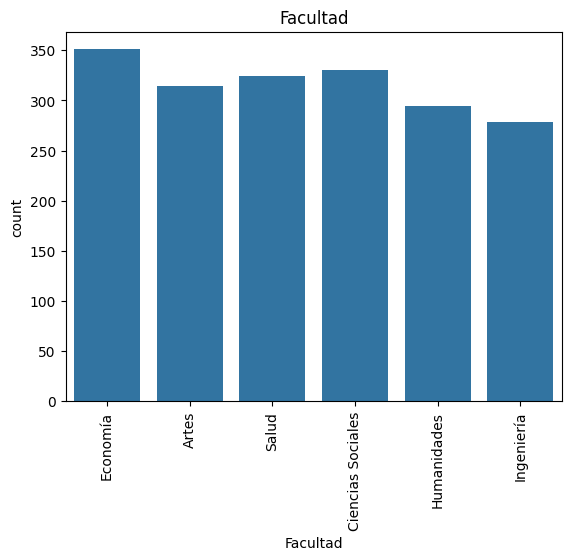

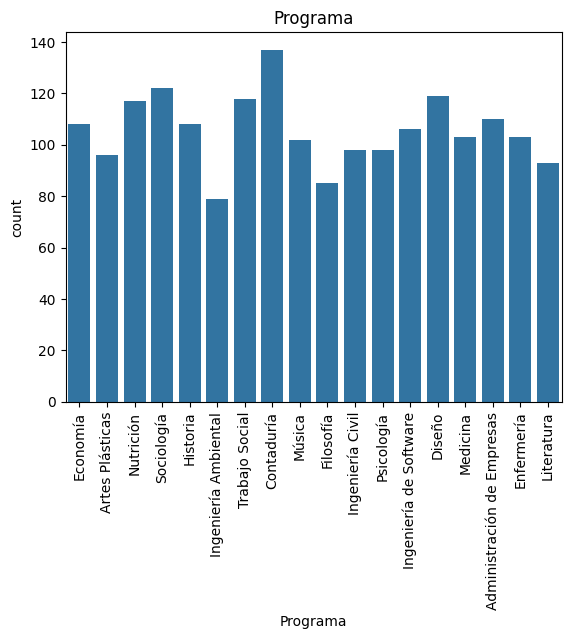

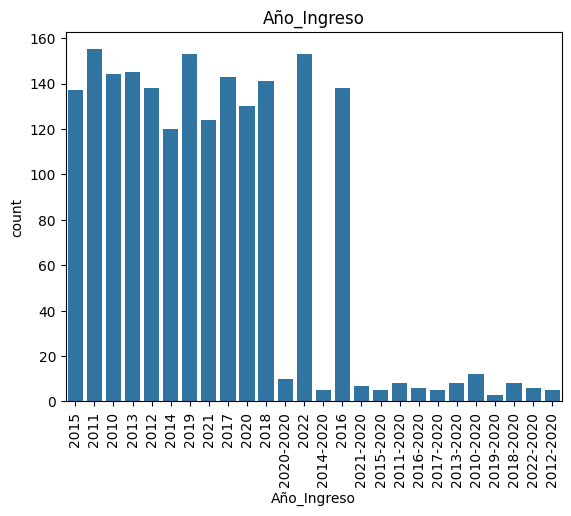

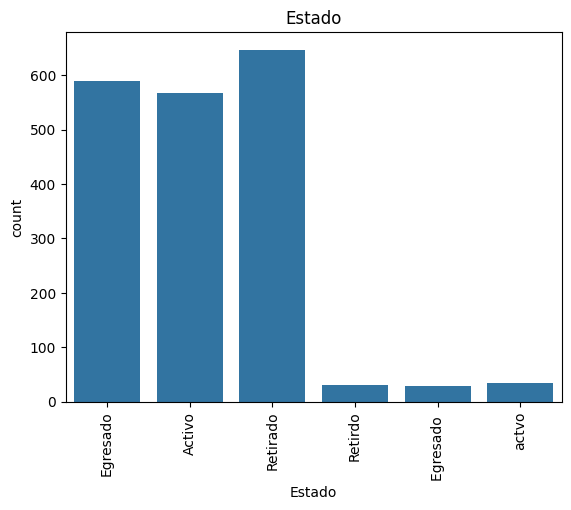

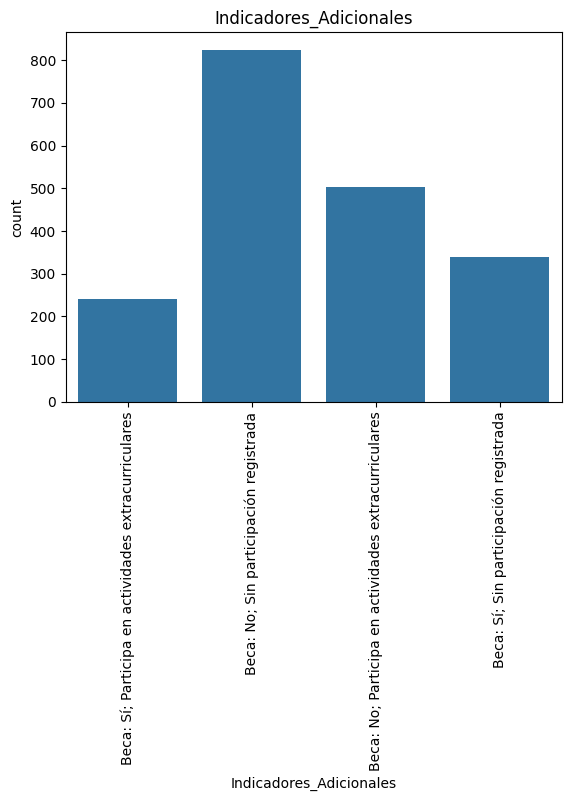

In [9]:
for i, col  in enumerate(cols_categ):
  sns.countplot(x=col, data=df)
  plt.title(col)
  plt.xticks(rotation=90)
  plt.show()

In [10]:
# Columnas Numericas
columnas   = list(df.columns)
cols_num = [x for x in columnas if df[x].dtype != 'object']
print(cols_num)
print(f'Tenemos {len(cols_num)} columnas numericas')

['ID_Estudiante', 'Promedio', 'Asistencia']
Tenemos 3 columnas numericas


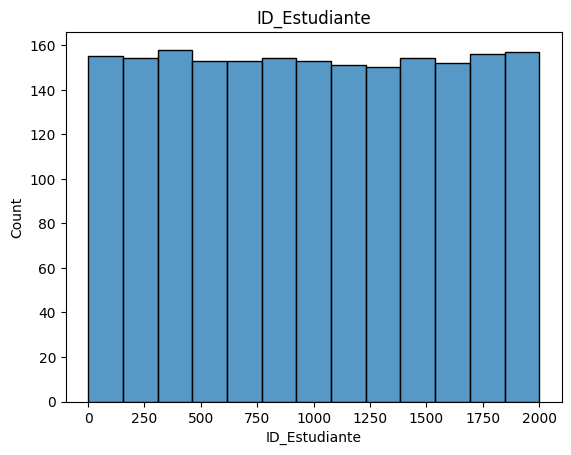

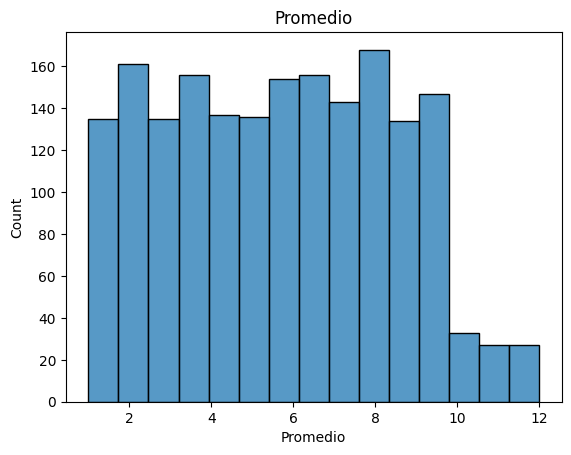

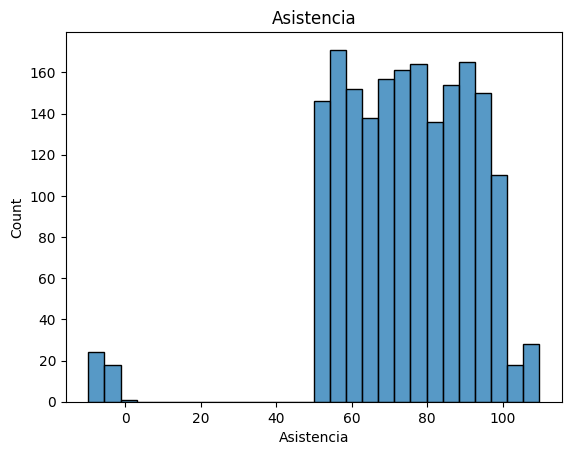

In [11]:
for i, col  in enumerate(cols_num):
  sns.histplot(x=col, data=df)
  plt.title(col)
  plt.show()

* Se confirma valores incoherentes en el apartado de promedio y asistencia, mencionados anteriormente.
* Algo curioso es que los datos de la asistencia se encuentra ubicada principalmente entre 50 - 100

## Limpieza y transformación Varibles categoricas

In [12]:
# Conociendo mas a fondo las variables categoricas para realizar la limpieza y transformación dado el caso
for col in cols_categ:
  print(f'Columna {col}: {df[col].nunique()} categorías')
  print(f'Columna {col}: {df[col].unique()} \n')

Columna Facultad: 6 categorías
Columna Facultad: ['Economía' 'Artes' 'Salud' 'Ciencias Sociales' 'Humanidades' 'Ingeniería'
 nan] 

Columna Programa: 18 categorías
Columna Programa: ['Economía' 'Artes Plásticas' 'Nutrición' 'Sociología' 'Historia'
 'Ingeniería Ambiental' 'Trabajo Social' 'Contaduría' 'Música' 'Filosofía'
 'Ingeniería Civil' 'Psicología' 'Ingeniería de Software' 'Diseño'
 'Medicina' 'Administración de Empresas' 'Enfermería' nan 'Literatura'] 

Columna Año_Ingreso: 26 categorías
Columna Año_Ingreso: ['2015' '2011' '2010' '2013' '2012' '2014' '2019' '2021' '2017' '2020'
 '2018' nan '2020-2020' '2022' '2014-2020' '2016' '2021-2020' '2015-2020'
 '2011-2020' '2016-2020' '2017-2020' '2013-2020' '2010-2020' '2019-2020'
 '2018-2020' '2022-2020' '2012-2020'] 

Columna Estado: 6 categorías
Columna Estado: ['Egresado' 'Activo' 'Retirado' 'Retirdo' nan 'Egresado ' 'actvo'] 

Columna Indicadores_Adicionales: 4 categorías
Columna Indicadores_Adicionales: ['Beca: Sí; Participa en acti

### Tareas a realizar:
* Eliminar espacios al inicio y final de cada palabra por precaución
* Corregir valores de año de ingreso donde se tiene dos fechas al tiempo Ej: "2017 - 2020"
* Arreglar errores tipográficos variable Estado
* Dividir Columna Indicadores Adicionales en dos columnas para un mayor entendimiento. Creando dos columnas Beca y Actividad extracurricular
* Arreglar datos faltantes

In [13]:
# Columna Facultad
# Eliminación de espacios al inicio y final por precausión
df_limpia = df.copy()
print(f'Categorias iniciales: {df_limpia["Facultad"].nunique()} ')

df_limpia['Facultad'] = df_limpia['Facultad'].str.strip()

print(f'Categorias finales: {df_limpia["Facultad"].nunique()}')

Categorias iniciales: 6 
Categorias finales: 6


In [14]:
# Columna Programa
df_limpia = df.copy()
print(f'Categorias iniciales: {df_limpia["Programa"].nunique()} ')

# Eliminación de estapcios al inicio y final por precausión
df_limpia['Programa'] = df_limpia['Programa'].str.strip()

print(f'Categorias finales: {df_limpia["Programa"].nunique()}')

Categorias iniciales: 18 
Categorias finales: 18


In [15]:
# Columna Estado
print(f'Categorias iniciales: {df_limpia["Estado"].nunique()} ')
print(df_limpia['Estado'].unique())

# Arreglar espacios al inicio o fin de las palabras
df_limpia['Estado'] = df_limpia['Estado'].str.strip()

# Arreglo error tipografico admin. y administrative // actvo y Activo
df_limpia['Estado'] = df_limpia['Estado'].str.replace('Retirdo', 'Retirado', regex=False)
df_limpia['Estado'] = df_limpia['Estado'].str.replace('actvo', 'Activo', regex=False)

print(f'Categorias finales: {df_limpia["Estado"].nunique()}')
print(df_limpia['Estado'].unique())

Categorias iniciales: 6 
['Egresado' 'Activo' 'Retirado' 'Retirdo' nan 'Egresado ' 'actvo']
Categorias finales: 3
['Egresado' 'Activo' 'Retirado' nan]


In [16]:
# Columna Año de ingreso
print(f'Categorias iniciales: {df_limpia["Año_Ingreso"].nunique()} ')
print(df_limpia['Año_Ingreso'].unique())

# Separar los años antes y después del '-'
a = df_limpia['Año_Ingreso'].str.split('-').str[0].astype('Int64')
b = df_limpia['Año_Ingreso'].str.split('-').str[1].astype('Int64')

# Elegi la fecha mas vieja entre las 2 posibles dado el caso,
# pero para manejar los valores nulos de columna a o b se les asigno un valor grande que no se este usando en este momento

# Manejar valores nulos antes de la comparación
a = a.fillna(3000)  # Si 'a' es NaN, toma el valor de 0
b = b.fillna(3000)  # Si 'b' es NaN, toma el valor de 0

# Reemplazar 'Año_Ingreso' con el menor de los dos valores
df_limpia['Año_Ingreso'] = np.where(a < b, a, b)
# Se reemplaza los valores "0" por nan para su posterior manejo
df_limpia.loc[df_limpia['Año_Ingreso'] == 3000, 'Año_Ingreso'] = 0

print(f'Categorias finales: {df_limpia["Año_Ingreso"].nunique()}')
print(df_limpia['Año_Ingreso'].unique())

Categorias iniciales: 26 
['2015' '2011' '2010' '2013' '2012' '2014' '2019' '2021' '2017' '2020'
 '2018' nan '2020-2020' '2022' '2014-2020' '2016' '2021-2020' '2015-2020'
 '2011-2020' '2016-2020' '2017-2020' '2013-2020' '2010-2020' '2019-2020'
 '2018-2020' '2022-2020' '2012-2020']
Categorias finales: 14
[2015 2011 2010 2013 2012 2014 2019 2021 2017 2020 2018    0 2022 2016]


In [17]:
# Columna Indicadores_Adicionales
print(f'Categorias iniciales: {df_limpia["Indicadores_Adicionales"].nunique()} ')
print(df_limpia['Indicadores_Adicionales'].unique())

# Creación Columna Beca separando el texto 
df_limpia['Indicadores_Adicionales']
a = df_limpia['Indicadores_Adicionales'].str.split(';').str[0] # Se obtiene por ejemplo "Beca: Sí"
a = a.str.split(': ').str[1] # Se obtiene por ejemplo "Sí"
df_limpia["Beca"] = a

# Creación Columna Actividad extracurricular
a = df_limpia['Indicadores_Adicionales'].str.split('; ').str[1]

a = a.str.replace('Participa en actividades extracurriculares', 'Sí', regex=False)
a = a.str.replace('Sin participación registrada', 'No', regex=False)
df_limpia["Actividad extracurricular"] = a

# Eliminación columna Indicadores Adicionales ya que no es necesaria con la creación de las dos anteriores
df_limpia = df_limpia.drop(columns=["Indicadores_Adicionales"])

# Resultado
df_limpia.head()

Categorias iniciales: 4 
['Beca: Sí; Participa en actividades extracurriculares'
 'Beca: No; Sin participación registrada'
 'Beca: No; Participa en actividades extracurriculares'
 'Beca: Sí; Sin participación registrada' nan]


,ID_Estudiante,Facultad,Programa,Año_Ingreso,Estado,Promedio,Asistencia,Beca,Actividad extracurricular
0,1861,Economía,Economía,2015,Egresado,NaN,71.920000,Sí,Sí
1,354,Artes,Artes Plásticas,2011,Egresado,2.51,63.640000,No,No
2,1334,Salud,Nutrición,2010,Activo,3.50,-6.318629,Sí,Sí
3,906,Ciencias Sociales,Sociología,2011,Retirado,1.85,NaN,No,Sí
4,1290,Humanidades,Historia,2013,Retirado,4.85,54.170000,Sí,No


In [18]:
data_faltante = df_limpia.isnull().sum().reset_index()
data_faltante = data_faltante.rename(columns = {0: "# Faltantes"})
data_faltante

,index,# Faltantes
0,ID_Estudiante,0
1,Facultad,107
2,Programa,98
3,Año_Ingreso,0
4,Estado,103
5,Promedio,151
6,Asistencia,107
7,Beca,91
8,Actividad extracurricular,91


## Datos Faltantes

In [19]:
data_faltante = df_limpia.isnull().sum().reset_index()
data_faltante = data_faltante.rename(columns = {0: "# Faltantes"})
data_faltante

,index,# Faltantes
0,ID_Estudiante,0
1,Facultad,107
2,Programa,98
3,Año_Ingreso,0
4,Estado,103
5,Promedio,151
6,Asistencia,107
7,Beca,91
8,Actividad extracurricular,91


In [20]:
# Datos faltantes columna Programa
a = df_limpia.groupby(["Facultad", "Programa"]).count().reset_index()
a = a[["Facultad", "Programa"]]
a

,Facultad,Programa
0,Artes,Artes Plásticas
1,Artes,Diseño
2,Artes,Música
3,Ciencias Sociales,Psicología
4,Ciencias Sociales,Sociología
5,Ciencias Sociales,Trabajo Social
6,Economía,Administración de Empresas
7,Economía,Contaduría
8,Economía,Economía
9,Humanidades,Filosofía


In [21]:
# Apartir de "a" que refleja que programas pertenecen a que facultad puedo encontrar datos faltantes
for i in range(len(df_limpia)):
    if df_limpia["Programa"][i] in a["Programa"].values:
        df_limpia.loc[i, "Facultad"] = a.loc[a["Programa"] == df_limpia["Programa"][i], "Facultad"].values[0]

# Resultado
data_faltante = df_limpia.isnull().sum().reset_index()
data_faltante = data_faltante.rename(columns = {0: "# Faltantes"})
data_faltante

,index,# Faltantes
0,ID_Estudiante,0
1,Facultad,5
2,Programa,98
3,Año_Ingreso,0
4,Estado,103
5,Promedio,151
6,Asistencia,107
7,Beca,91
8,Actividad extracurricular,91


In [22]:
# Podemos hacer el proceso inverso que usamos para la columna Programa. Usamos programas para encontrar faltantes de facultad
b = df_limpia.copy()
b = b.groupby("Facultad")["Programa"].agg(lambda x: x.mode().iloc[0]).reset_index()

In [23]:
# Asignar 'Facultad' basado en 'Programa' desde el DataFrame 'a'
df_limpia = df_limpia.merge(a[["Programa", "Facultad"]], on="Programa", how="left", suffixes=('', '_nuevo'))

# Si 'Facultad' está vacía en df_prueba, usa la nueva asignada
df_limpia["Facultad"] = df_limpia["Facultad"].fillna(df_limpia["Facultad_nuevo"])

# Eliminar columna auxiliar
df_limpia.drop(columns=["Facultad_nuevo"], inplace=True)

# Asignar 'Programa' basado en 'Facultad' desde el DataFrame 'b'
df_limpia = df_limpia.merge(b[["Facultad", "Programa"]], on="Facultad", how="left", suffixes=('', '_nuevo'))

# Si 'Programa' está vacío en df_prueba, usa el nuevo asignado
df_limpia["Programa"] = df_limpia["Programa"].fillna(df_limpia["Programa_nuevo"])

# Eliminar columna auxiliar
df_limpia.drop(columns=["Programa_nuevo"], inplace=True)

# Resultado
data_faltante = df_limpia.isnull().sum().reset_index()
data_faltante = data_faltante.rename(columns = {0: "# Faltantes"})
data_faltante

,index,# Faltantes
0,ID_Estudiante,0
1,Facultad,5
2,Programa,5
3,Año_Ingreso,0
4,Estado,103
5,Promedio,151
6,Asistencia,107
7,Beca,91
8,Actividad extracurricular,91


In [24]:
# Datos faltantes columna Estado
df_limpia["Estado"] = df_limpia["Estado"].fillna("No registrado")

# Resultado
data_faltante = df_limpia.isnull().sum().reset_index()
data_faltante = data_faltante.rename(columns = {0: "# Faltantes"})
data_faltante

,index,# Faltantes
0,ID_Estudiante,0
1,Facultad,5
2,Programa,5
3,Año_Ingreso,0
4,Estado,0
5,Promedio,151
6,Asistencia,107
7,Beca,91
8,Actividad extracurricular,91


In [25]:
# Datos faltantes columna Estado
# La razón de porque "No" es porque el impacto que puede tener es menor que un "Sí"
df_limpia["Beca"] = df_limpia["Beca"].fillna("No")

# Resultado
data_faltante = df_limpia.isnull().sum().reset_index()
data_faltante = data_faltante.rename(columns = {0: "# Faltantes"})
data_faltante

,index,# Faltantes
0,ID_Estudiante,0
1,Facultad,5
2,Programa,5
3,Año_Ingreso,0
4,Estado,0
5,Promedio,151
6,Asistencia,107
7,Beca,0
8,Actividad extracurricular,91


In [26]:
# Datos faltantes columna Actividad extracurricular
# La razón de porque "No" es porque el impacto que puede tener es menor que un "Sí"

df_limpia["Actividad extracurricular"] = df_limpia["Actividad extracurricular"].fillna("No")

# Resultado
data_faltante = df_limpia.isnull().sum().reset_index()
data_faltante = data_faltante.rename(columns = {0: "# Faltantes"})
data_faltante

,index,# Faltantes
0,ID_Estudiante,0
1,Facultad,5
2,Programa,5
3,Año_Ingreso,0
4,Estado,0
5,Promedio,151
6,Asistencia,107
7,Beca,0
8,Actividad extracurricular,0


In [27]:
# Datos Faltantes Promedio y Asitencia
# Se eliminan directamente estas filas debido a que considero que puede tener un alto impacto negativo suponer promedios o asistencias
# Ademas, el eliminarnos no nos supone una gran perdida de información

print(df_limpia.shape)

df_limpia.dropna(inplace=True)
data_faltante = df_limpia.isnull().sum().reset_index()
data_faltante = data_faltante.rename(columns = {0: "# Faltantes"})
data_faltante

df_limpia.shape

(2000, 9)


(1743, 9)

## Limpieza y transformación columnas numericas

Se realiza la limpieza y transformación de las columnas numericas en este punto porque el camino que tomare supone eliminar información, la cual puede afectar el proceso de datos faltantes para rellenar facultad y programa.

In [28]:
# Columna Asistencia
print(f'Tamaño inicial: {df_limpia.shape}')

# Definición de limites para promedio entre 0 y 100. Los datos por fuera son eliminados
df_limpia = df_limpia[(df_limpia["Asistencia"]<=100) & (df_limpia["Asistencia"]>=0)]

print(f'Tamaño final: {df_limpia.shape}')

Tamaño inicial: (1743, 9)
Tamaño final: (1656, 9)


In [29]:
# Columna Promedio
print(f'Tamaño inicial: {df_limpia.shape}')

# Definición de limites para promedio entre 0 y 10. Los datos por fuera son eliminados
df_limpia = df_limpia[(df_limpia["Promedio"]>=0) & (df_limpia["Promedio"]<=10)]

print(f'Tamaño final: {df_limpia.shape}')

Tamaño inicial: (1656, 9)
Tamaño final: (1607, 9)


In [30]:
cols_num

['ID_Estudiante', 'Promedio', 'Asistencia']

## Graficas post limpieza y transformación

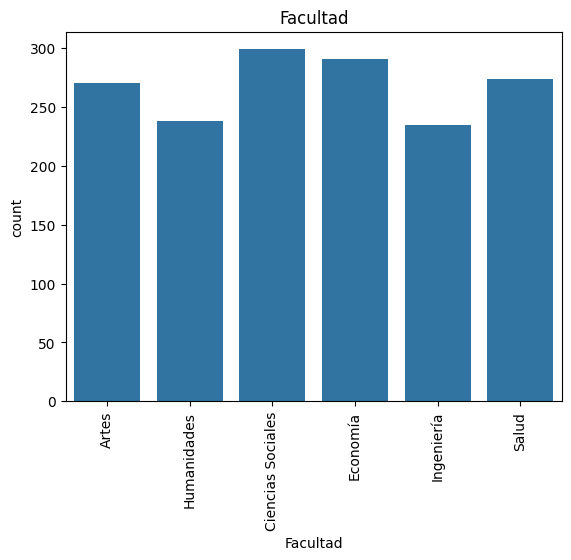

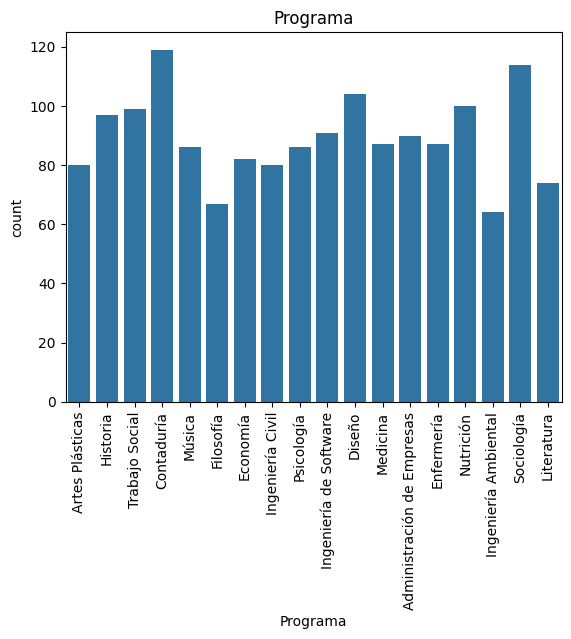

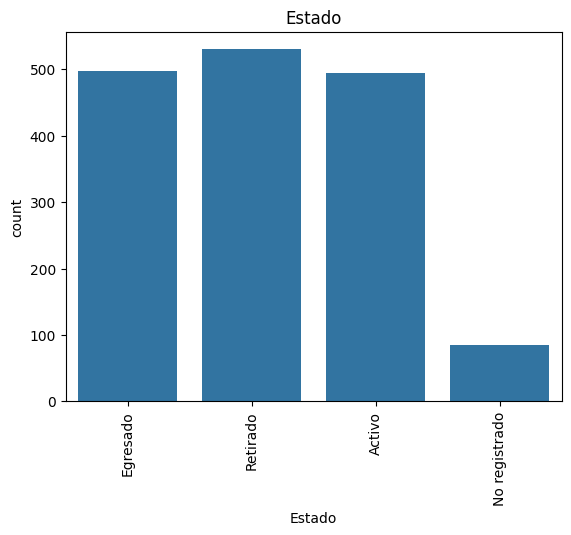

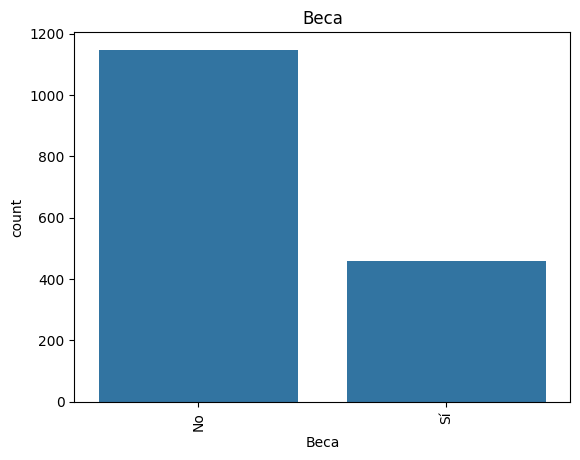

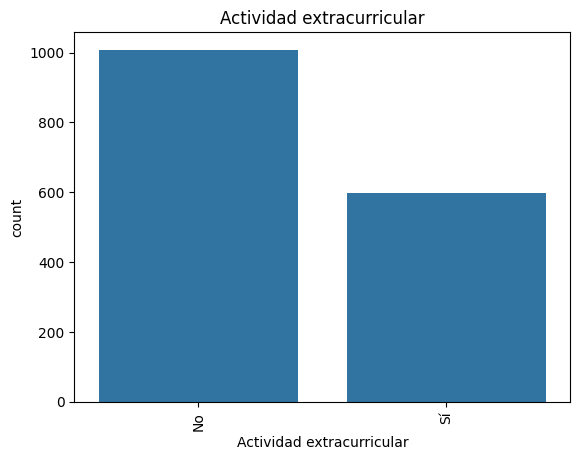

In [31]:
# Columnas Categóricas
columnas   = list(df_limpia.columns)
cols_categ = [x for x in columnas if df_limpia[x].dtype == 'object']
cols_categ

for i, col  in enumerate(cols_categ):
  sns.countplot(x=col, data=df_limpia)
  plt.title(col)
  plt.xticks(rotation=90)
  plt.show()

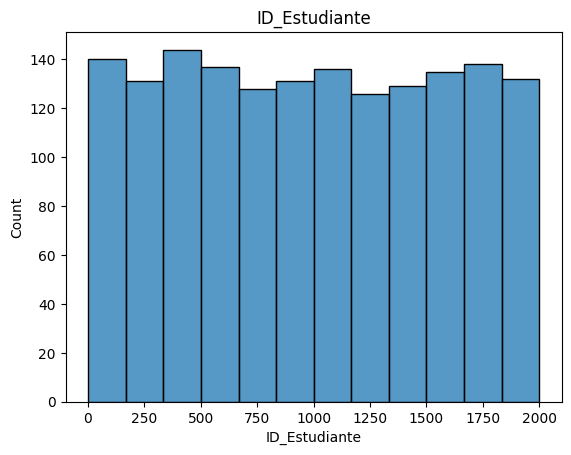

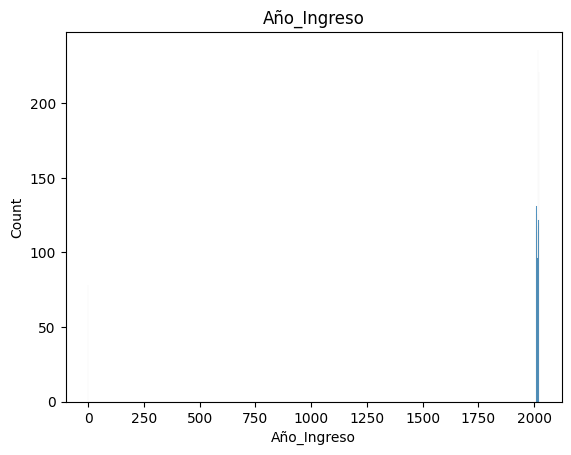

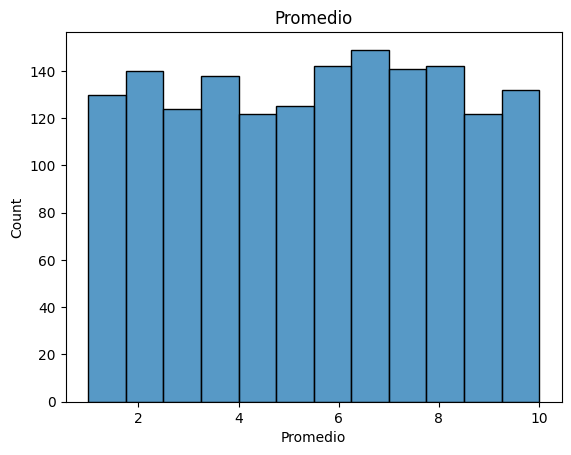

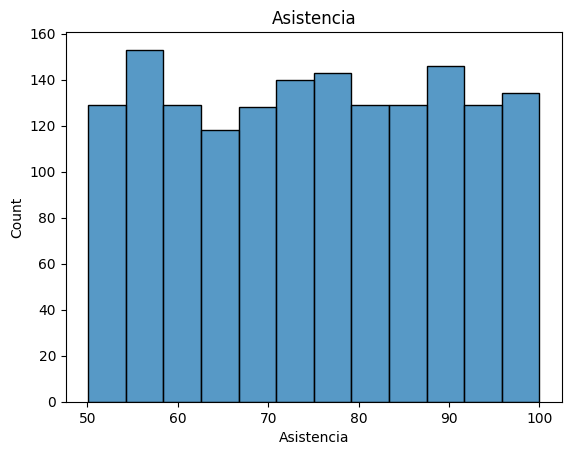

In [32]:
# Columnas numericas

columnas   = list(df_limpia.columns)
cols_num = [x for x in columnas if df_limpia[x].dtype != 'object']
cols_num

for i, col  in enumerate(cols_num):
  sns.histplot(x=col, data=df_limpia)
  plt.title(col)
  plt.show()

## Datos faltantes antes y despues

Text(0.5, 1.0, 'Datos faltantes despues')

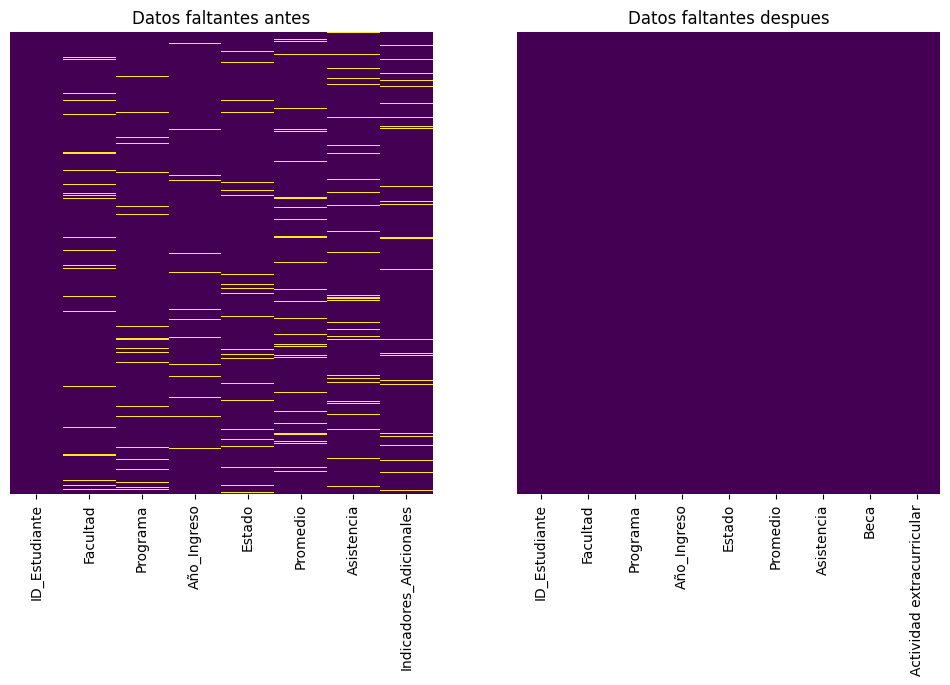

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Datos faltantes antes')

plt.subplot(1, 2, 2)
sns.heatmap(df_limpia.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Datos faltantes despues')

In [34]:
tamano_data_final = len(df_limpia)*100/len(df)
tamano_data_final

80.35

In [35]:
df_limpia.to_csv('data_limpia.csv',sep=';', header=True,index=False, encoding='utf-8-sig')

## Conclusión: Despues del proceso de limpieza conservamos un 80.35% de la data original, la cual no tiene datos faltantes.